Plot Figure 1: Behavior and Neural Discrimination plots

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot

In [31]:
# Fix for only certain xticks appearing...
def fix_xticks(ax, days_plot = [-2, -1, 4, 1, 2, 7]):
    days_str = [str(e) for e in days_plot]
    plt.sca(ax)
    plt.xticks(list(range(len(days_plot))), days_str)


[8.5  4.75]


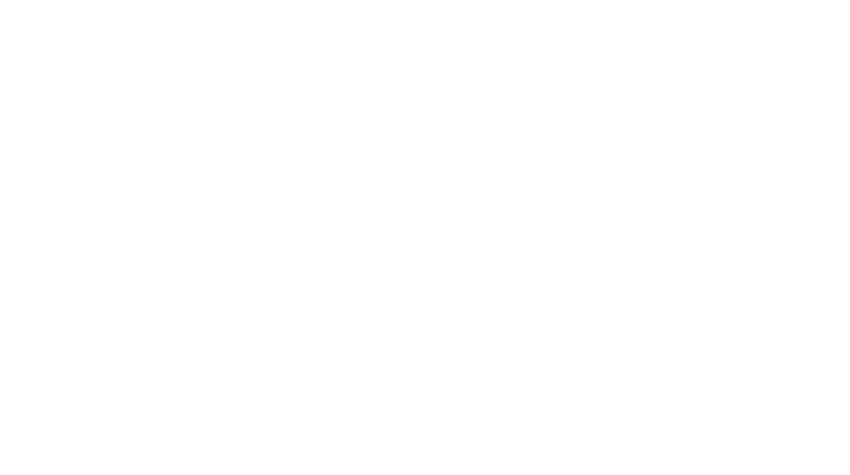

In [4]:
# Set up main figure plotting
%matplotlib ipympl
Fig1 = Fig(num=1, grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(Fig1.fig.get_size_inches())

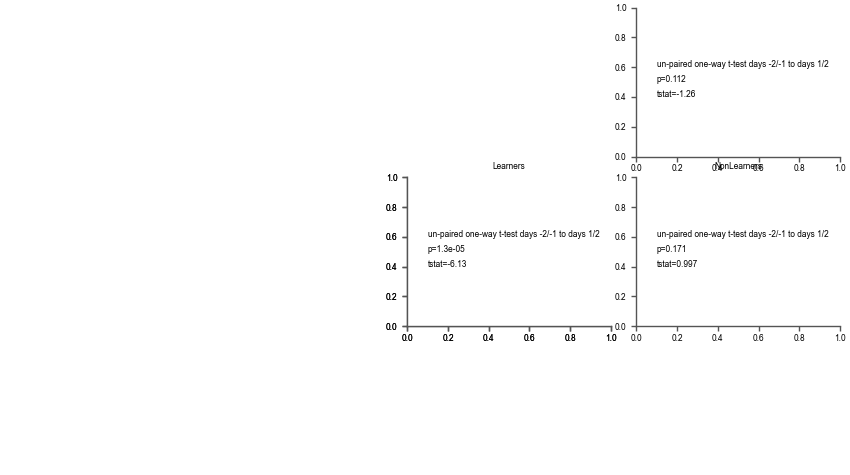

In [63]:
plt.show()

In [55]:
# Set up main figure stats companion plot
Fig1stats = Fig(num='Figure 1 stats', grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(Fig1stats.fig.get_size_inches())

[8.5  4.75]


In [6]:
# Designate Placeholders
aexp = Fig1.subplot(Fig1.gs[0, 0:2])
aexp.set_title('Exp. Outline Here')
aexp.axis('off')
aehisto = Fig1.subplot(345)
aehisto.set_title('Histology Here?')
aehisto.axis('off')
plt.draw()

In [7]:
# Plot Control mice behavior
axc = Fig1.subplot(343)
figc, axc, fratio_cont = er.plot_all_freezing(err.control_mice_good, ax=axc, s=9, xoffset=0.1)
axc.set_ylim([-0.025, 0.80])
axc.set_title('Control')
fix_xticks(axc)
axc.set_xlabel('')
axc.set_xticklabels('')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 2']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


[Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, '')]

In [47]:
# Increase in arena-specific freezing from days -2/-1 to days 1/2 is significant for controls
tstatc, ptc = s.ttest_ind((fratio_cont[1, 0:2, :] - fratio_cont[0, 0:2, :]).reshape(-1),
                           (fratio_cont[1, 3:5, :] - fratio_cont[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(ptc/2)
print(tstatc)

astatsc = Fig1stats.subplot(343)
astatsc.text(0.1, 0.7, 'Control Mice')
astatsc.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsc.text(0.1, 0.5, f'p={ptc/2:0.3g}')
astatsc.text(0.1, 0.4, f'tstat={tstatc:0.3g}')
astatsc.axis('off')

0.025104577549869396
-2.046407579787083


In [8]:
# Plot ANI mice behavior
axa = Fig1.subplot(344)
figa, axa, fratio_ani = er.plot_all_freezing(err.ani_mice_good, ax=axa, s=9, xoffset=0.1)
axa.set_ylim([-0.025, 0.80])
fix_xticks(axa)
axa.set_xlabel('')
axa.set_xticklabels('')
axa.set_ylabel('')
axa.set_title('Anisomycin')

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


Text(0.5, 1.0, 'Anisomycin')

In [56]:
# Non-significant increase in freezing for ANI mice from before to after (days -2/-1 to days 1/2)
astatsa = Fig1stats.subplot(344)
tstata, pta = s.ttest_ind((fratio_ani[1, 0:2, :] - fratio_ani[0, 0:2, :]).reshape(-1),
                           (fratio_ani[1, 3:5, :] - fratio_ani[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(pta/2)
print(tstata)

astatsa.text(0.1, 0.7, 'ANI Mice')
astatsa.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsa.text(0.1, 0.5, f'p={pta/2:0.3g}')
astatsa.text(0.1, 0.4, f'tstat={tstata:0.3g}')
astatsa.axis('off')

0.11178530200553738
-1.2605402424159724


Text(0.1, 0.4, 'tstat=-1.26')

In [9]:
# Plot Discrimination Index (DI) ratios for day 1-2
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# subfighist = Fig1.fig.add_subfigure(Fig1.gs[1, 0])
# ahist = subfighist.subplots(1, 2, sharey=True)
ahist = Fig1.subplot(346)
_, bins, cbar = ahist.hist(DI_aft, 6)
ahist.set_ylabel('Count')
ahist.set_xlabel('$DI_{beh}$')
ahist.axvline(learning_cutoff, linestyle='--', color='k')

# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

In [10]:
# Here are all the DIs for controls averaged across days 1 and 2 - note that this metric can distort things as 
# animal 3, for example, freezes very little in either arena and so is a non-learner even though he has a lower DI
# value, while animal 1 and animal 3 freeze in both arenas and are also a non-learner.
DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0)

array([-0.10379693, -0.39033887, -0.21642609, -0.59563518,         nan,
       -0.71391564, -0.36638349, -0.06170731])

In [14]:
from itertools import compress
# Print out learners vs. non-learners
learn_bool = DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0) < learning_cutoff
# learners = err.control_mice_good[learn_bool]
learners = list(compress(err.control_mice_good, learn_bool))
nonlearners = list(compress(err.control_mice_good, ~learn_bool))
print('Learners')
print(learners)
# Check that matches what's in your code
print(err.learners)

# Note that Marble 14 can't really be designated either way since his open field behavioral data was corrupted on
# those days. However, he would likely be a non-learner since he barely freezes in the shock arena after shock.
print('Non-Learners')
print(nonlearners)
# Check that matches what's in your code
print(err.nonlearners)

Learners
['Marble07', 'Marble12', 'Marble24', 'Marble27']
['Marble07', 'Marble12', 'Marble24', 'Marble27']
Non-Learners
['Marble06', 'Marble11', 'Marble14', 'Marble29']
['Marble06', 'Marble11', 'Marble29']


In [15]:
# Plot non-learners and learners
axlrn = Fig1.subplot(347)
_, axlrn, fratio_lrn = er.plot_all_freezing(err.learners, ax=axlrn, s=9, xoffset=0.1)
axlrn.set_title('Learners')
axlrn.set_ylim([-0.025, 0.80])

axnlrn = Fig1.subplot(348)
_, axnlrn, fratio_nl = er.plot_all_freezing(err.nonlearners, ax=axnlrn, s=9, xoffset=0.1)
axnlrn.set_ylim([-0.025, 0.80])
axnlrn.set_ylabel('')
axnlrn.set_title('Non-Learners')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session


Text(0.5, 1.0, 'Non-Learners')

In [61]:
# Highly sig freezing for Learners
tstatlrn, ptlrn = s.ttest_ind((fratio_lrn[1, 0:2, :] - fratio_lrn[0, 0:2, :]).reshape(-1),
                           (fratio_lrn[1, 3:5, :] - fratio_lrn[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(ptrellrn)
print(strellrn)
astatslrn = Fig1stats.subplot(347)
astatslrn.text(0.1, 0.7, 'Learners')
astatslrn.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatslrn.text(0.1, 0.5, f'p={ptlrn/2:0.3g}')
astatslrn.text(0.1, 0.4, f'tstat={tstatlrn:0.3g}')
astatslrn.axis('off')

0.000899342348533893
-13.395748272650458


Text(0.1, 0.4, 'tstat=-6.13')

In [62]:
# Non-sig freezing for NonLearners
tstatnl, ptnl = s.ttest_ind((fratio_nl[1, 0:2, :] - fratio_nl[0, 0:2, :]).reshape(-1),
                           (fratio_nl[1, 3:5, :] - fratio_nl[0, 3:5, :]).reshape(-1), nan_policy='omit')

print(ptnl)
print(tstatnl)
astatsnl = Fig1stats.subplot(348)
astatsnl.text(0.1, 0.7, 'NonLearners')
astatsnl.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsnl.text(0.1, 0.5, f'p={ptnl/2:0.3g}')
astatsnl.text(0.1, 0.4, f'tstat={tstatnl:0.3g}')
aststsnl.axis('off')

0.34211175634596924
0.9973584695991825


Text(0.1, 0.4, 'tstat=0.997')

## NRK todo - run stats between ANI, Learn, and NL

In [70]:
## Run stats
pval_bwgroup_1sidedt_specific = np.ones(6)*np.nan
pval_ani_nl_1sidedt_specific = np.ones(6)*np.nan
pval_lrn_nl_1sidedt_specific = np.ones(6)*np.nan
pval_bwgroup_1sidedt_shockonly = np.ones(6)*np.nan # bw lrn and ani directly, no accounting for specificity
for id in range(0, 6):
    
    # ANI vs Learners
    stats, pval = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # ANI vs Non-Learners
    stats_nla, pval_nla = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # Learners vs Non-Learners
    stats_lrnnl, pval_lrnnl = s.ttest_ind(fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    

    statss, pvals = s.ttest_ind(fratio_ani[1, id, :], fratio_lrn[1, id, :], nan_policy='omit')
    pval_bwgroup_1sidedt_shockonly[id] = pvals/2

    # Hypothesis is that ani freezing is less than control guys relative to neutral arena
    # So if ani guys mean freezing relative to shock is < 0 (i.e. if stats < 0), divide the pvalue by 2
    # If it's actually larger, then test fails and p = 1-pval/2
    if stats < 0:
        pval_bwgroup_1sidedt_specific[id] = pval/2
    elif stats > 0:
        pval_bwgroup_1sidedt_specific[id] = 1 - pval/2
        
    if stats_nla < 0:
        pval_ani_nl_1sidedt_specific[id] = pval_nla/2
    elif stats_nla > 0:
        pval_ani_nl_1sidedt_specific[id] = 1 - pval_nla/2
       
    if stats_lrnnl < 0:
        pval_lrn_nl_1sidedt_specific [id] = pval_lrnnl/2
    elif stats_lrnnl > 0:
        pval_lrn_nl_1sidedt_specific [id] = 1 - pval_lrnnl/2

    if stats_no29 < 0:
        pval_bwgroup_1sidedt_specific_no29[id] = pval_no29 / 2
    elif stats_no29 > 0:
        pval_bwgroup_1sidedt_specific_no29[id] = 1 - pval_no29 / 2


In [72]:
pval_bwgroup_1sidedt_shockonly

array([0.3452869 , 0.12777793, 0.20240588, 0.02788571, 0.06049871,
       0.4686157 ])

In [71]:
pval_lrn_nl_1sidedt_specific

array([0.89390401, 0.74705077, 0.22001408, 0.00390776, 0.0267404 ,
       0.65652119])

In [69]:
pval_ani_nl_1sidedt_specific

array([0.05894439, 0.07336907, 0.26522286, 0.56865479, 0.36939868,
       0.20168141])

In [67]:
pval_bwgroup_1sidedt_specific

array([0.15982043, 0.03984214, 0.06282463, 0.00066744, 0.0364155 ,
       0.21057399])

In [ ]:
##  Now between day -1 and day 1 for each group, shock arena only

validc_bool = np.bitwise_and(~np.isnan(fratio_cont[1, 1, :]),
                             ~np.isnan(fratio_cont[1, 3, :]))
statsc_paired, pvalc_paired = s.ttest_rel(fratio_cont[1, 1, validc_bool],
                                          fratio_cont[1, 3, validc_bool])
statsc_ind, pvalc_ind = s.ttest_ind(fratio_cont[1, 1, ~np.isnan(fratio_cont[1, 1, :])],
                                    fratio_cont[1, 3, ~np.isnan(fratio_cont[1, 3, :])])


In [ ]:
Fig1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1'), scriptname='Figure1Notebook')

In [ ]:
Fig1stats.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1stats'), scriptname='Figure1Notebook')